# Task 1: Gradient Descent Algorithm

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [27]:
# Returns a vector, which is the result of the gradient
def gradient(A, b, x):
    return A.dot(x) - b

# Returns a scalar, which is the norm of the result above
def gradientNorm(A, b, x):
    return np.linalg.norm(A.dot(x) - b)

# Returns a scalar, which is the norm of the difference between x and x*
def differenceNorm(x, x_opt):
    return np.linalg.norm(x - x_opt)

# Returns a scalar, which is the norm of x
def norm(x):
    return np.linalg.norm(x)

# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(differenceNorms):
    figure(figsize=(6, 4), dpi=80)

    iterations = np.arange(1, differenceNorms.size + 1, 1)

    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")#, marker='.', markersize=5)
  
    size = 14

    plt.title(f"Convergence rate of\ngradient descent algorithm", size=size + 6)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=3, frameon=False, fontsize=size)

![image.png](images/gradientDescent.png)

In [28]:
def gradientDescent(A, b, maxIters = 5000, epsilon = 10e-5):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # Fixed step size
    alpha = 0.0001
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = [x]
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        x = x - alpha * gradient(A, b, x)
        x_iterations.append(x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter}"
    return (x, x_iterations, stoppingReason)

In [29]:
# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(scale, maxIter, tolerance, algorithmName, algorithm):

    A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
    # print("The matrix A")
    # print(A)

    b = np.load(f"{scale}Vector.npy", allow_pickle=True)
    # print("\nThe vector b")
    # print(b)
    x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

    print(f"\nThe {scale} scale problem is chosen. The matrix A and vector b dimension is {b.size}")
    print(f"The number of maximum iterations is {maxIter}. The allowed tolerance for gradient norm is {tolerance}" )

    start = time.time()
    x_opt_algo, x_iterations_algo, stoppingReason = algorithm(A, b, maxIter, tolerance)
    end = time.time()
    print(f"\nThe {algorithmName} algorithm runs in {end - start} seconds")
    print("Reason of stopping")
    print(stoppingReason)
    if scale == "huge":
        print("\nFirst 100 values in the optimal solution x found by FISTA algorithm")
        print(x_opt_algo[0:100])
        print("\nFirst 100 values in the theoretical optimal solution x*")
        print(x_opt[0:100])
    else:
        print("\nThe optimal solution x found by FISTA algorithm")
        print(x_opt_algo)
        print("\nThe theoretical optimal solution x*")
        print(x_opt)

    differenceNorms = []
    for x_sol in x_iterations_algo:
        differenceNorms.append(differenceNorm(x_sol, x_opt))
    differenceNorms = np.array(differenceNorms)

    figure(figsize=(6, 4), dpi=80)

    iterations = np.arange(0, differenceNorms.size, 1)

    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")#, marker='.', markersize=5)
  
    size = 14

    plt.title(f"Convergence rate of\n{algorithmName} algorithm", size=size + 6)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=3, frameon=False, fontsize=size)
    plt.show()


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.0001

The gradient descent algorithm runs in 0.1540384292602539 seconds
Reason of stopping
Max iterations (20000) exceeded

The optimal solution x found by FISTA algorithm
[1.86848846 4.41061567 4.57841824 3.4172977  6.71370523 6.94533302
 5.98155673 5.62339148 5.57259766 8.78956492]

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


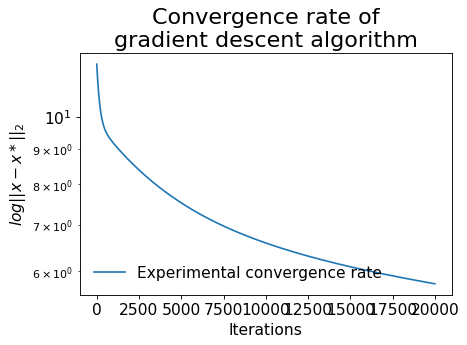


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.001


KeyboardInterrupt: 

In [30]:
scales = ["small", "large", "huge"]
maxIters = [20000, 20000, 50000]
tolerances = [10e-5, 10e-4, 10e-3]
algorithmName = "gradient descent"
algorithm = gradientDescent
for i in range(0,3):
    plotDifferenceNorms(scales[i], maxIters[i], tolerances[i], algorithmName, algorithm)

It appears that the implemented gradient descent has a linear convergence rate

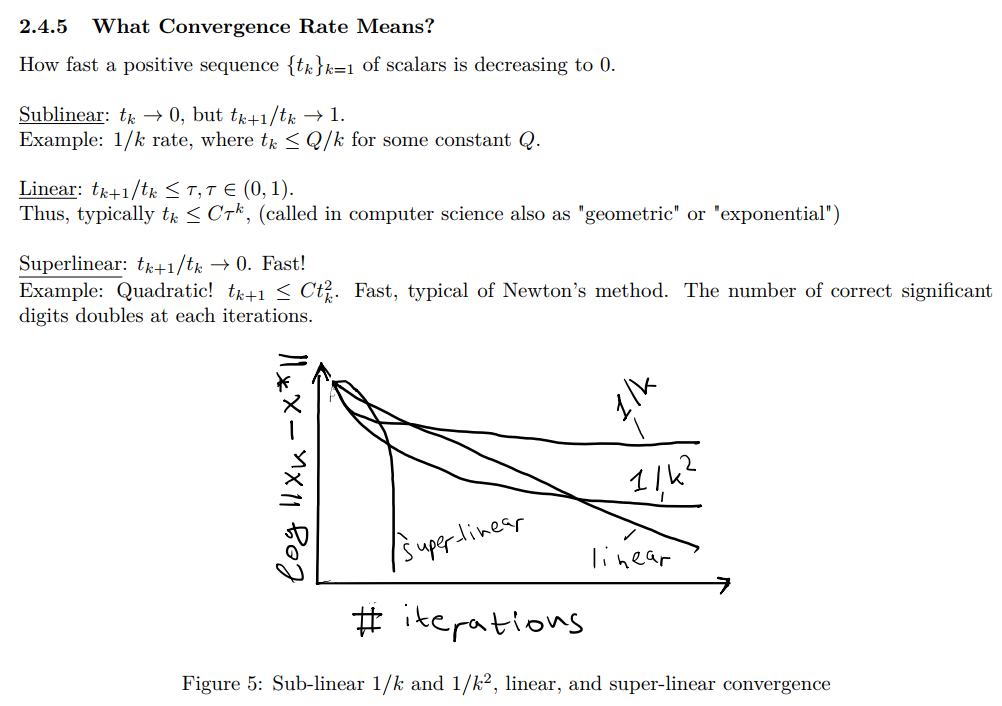

## Order of convergence $\alpha$ and rate of convergence $\lambda$
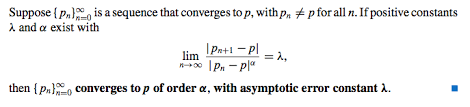
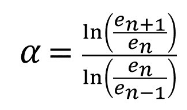
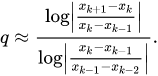

In [ ]:
errors = np.abs(np.diff(differenceNorms))

errors_nminus1 = errors[:-2]

errors_n = errors[:-1]
errors_n = errors_n[1:]

errors_nplus1 = errors[2:]

orderOfConvergences = np.divide(np.log(np.abs(np.divide(errors_nplus1, errors_n))), np.log(np.abs(np.divide(errors_n, errors_nminus1))))

print(orderOfConvergences)

[nan nan nan ... nan nan nan]


In [ ]:
errors = np.abs(np.diff(differenceNorms))

errors_nminus1 = errors[:-2]

errors_n = errors[:-1]
errors_n = errors_n[1:]

errors_nplus1 = errors[2:]

orderOfConvergences = np.divide(np.log(np.abs(np.divide(errors_nplus1, errors_n))), np.log(np.abs(np.divide(errors_n, errors_nminus1))))

print(orderOfConvergences)

[nan nan nan ... nan nan nan]


In [ ]:
orderOfConvergence = 1

x_nplus1_minus_x_opt = np.array(list(map(lambda x: norm(x), np.abs(x_iterations_GD[:-1] - x_opt_GD))))

x_n_minus_x_opt = np.power(np.array(list(map(lambda x: norm(x), np.abs(x_iterations_GD[1:] - x_opt_GD)))), orderOfConvergence) 

x_nplus1_minus_x_opt[x_nplus1_minus_x_opt == 0] = 1e-9
x_n_minus_x_opt[x_n_minus_x_opt == 0] = 1e-9
rateOfConvergences = np.divide(x_nplus1_minus_x_opt, x_n_minus_x_opt)
print(rateOfConvergences)

# The rate of convergence seems to be 1.014

[nan nan nan ... nan nan nan]


C:\Users\nguye\AppData\Local\Temp\ipykernel_26120\2449733212.py:5: RuntimeWarning: invalid value encountered in subtract
  x_n_minus_x_opt = np.power(np.array(list(map(lambda x: norm(x), np.abs(x_iterations_GD[1:] - x_opt_GD)))), orderOfConvergence)


In [ ]:
figure(figsize=(8, 6), dpi=80)

print(rateOfConvergences.size)
iterations = np.arange(0, rateOfConvergences.size, 1)
print(iterations)
plt.plot(iterations, rateOfConvergences, label = f"Experimental convergence rate")#, marker='.', markersize=5)

size = 10

plt.title(f"Experimental convergence rate", size=size + 2)
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
plt.yscale('log')
plt.xlabel("Iterations", size=size)
plt.ylabel('Difference norm', size=size)

legend = plt.legend(loc=4, frameon=False, fontsize=size + 4)

1599
[   0    1    2 ... 1596 1597 1598]


ValueError: Data has no positive values, and therefore can not be log-scaled.